# Main Notebook, Machine Learning Kaggle Competition - Team 9
## Classification task : Predicting income levels for US residents in the years 2020-2021 
#### Lan Hoang, Mathis Da Silva and Adrien Kühne

The goal of this project is to model and predict the income level (high or low) based on demographic predictors. In order to do this, we were given 2 data sets : train.csv and test.csv. The train set will be used to build our model and the test set will be used to evaluate our model and to send the predictions on Kaggle.com.

The structure of our report will be as follows : 
1. Introduction: Description of the data set, imports, notebook structure
2. Exploratory data analysis and feature engineering
3. Description of the best predictive model used, comparison of different methods, tuning parameters
analysis, model selection approach
4. Best model diagnostics and final kaggle prediction
5. Conclusion


## 1. Introduction :

In order to know how we will treat this data set, we first need to understand the data :  

### Data fields

1. id - The observation index for the given dataset
2. age - Age of the worker (Numeric)
3. capital_gains - Capital gains (Numeric)
4. capital_losses - Capital losses (Numeric)
5. citizenship - Citizenship (Categorical)
6. class_worker - Class of worker (Categorical)
7. country_father - Country of birth father (Categorical)
8. country_mother - Country of birth mother (Categorical)
9. country_self - Country of birth (Categorical)
10. det_hh_fam_stat - Detailed household and family status (Categorical)
11. det_hh_summ - Detailed household summary in household (Categorical)
12. education - Level of education (Categorical)
13. fam_under_18 - Family members under 18 (Categorical)
14. full_or_part_emp - Full- or part-time employment status (Categorical)
15. **high_income - Income level: 0, 1 (1 means high income) (Categorical)** -- response variable
16. hisp_origin - Hispanic origin (Categorical)
17. hs_college - Enrolled in educational institution last week (Categorical)
18. ind_code_level1 - Broad industry code (Categorical)
19. ind_code_level2 - Detailed industry code (Numeric)
20. marital_stat - Marital status (Categorical)
21. mig_chg_msa - Migration code - change in MSA (Categorical)
22. mig_chg_reg - Migration code - change in region (Categorical)
23. mig_move_reg - Migration code - move within region (Categorical)
24. mig_prev_sunbelt - Migration - previous residence in sunbelt (Categorical)
25. mig_same - Live in this house one year ago (Categorical)
26. num_emp - Number of other family members who are self employed (Numeric)
27. occ_code_level1 - Broad occupation code (Categorical)
28. occ_code_level2 - Detailed occupation code (Numeric)
29. own_or_self - Own business or self-employed? (Numeric)
30. race - Race (Categorical)
31. region_prev_res - Region of previous residence (Categorical)
32. sex - Sex (Categorical)
33. state_prev_res - State of previous residence (Categorical)
34. stock_dividends - Dividends from stocks (Numeric)
35. tax_filer_stat - Tax filer status (Categorical)
36. unemp_reason - Reason for unemployment (Categorical)
37. union_member - Member of a labor union (Categorical)
38. vet_benefits - Veterans benefits (Numeric)
39. vet_question - Fill included questionnaire for Veterans Administration (Categorical)
40. wage_per_hour - Wage per hour in $ (Numeric)
41. weeks_worked - Weeks worked in the year (Numeric)

The data set has 41 columns and is composed of numerical and categorical variables. The first column "id", is irrelevant for predicting since it is just the index number for each observation. It will only be used during the Kaggle submission. This is why we will consider dropping it during the prediciton task.

Now we will have a deeper look inside the train data set.

## 2.1. Exploratory Data Analysis:

In [14]:
### Importing the libraries
import numpy as np
import pandas as pd
import plotly.express as px
import pylab 

#plotting lib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


#Sklearn Lib metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import chi2


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Missing values : 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
import missingno as msno

#Dummy
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn. preprocessing import StandardScaler


pd.set_option("display.max_columns",None)

In [15]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

In [16]:
# Dropping the id variable as mentioned above

train_df.drop("id",axis = 1,inplace = True)
train_df.shape

(54607, 40)

We can see that after dropping the "id" variable, the dataset is now composed of 40 columns and 54607 rows

In [17]:
# Examine the dataframes
display(train_df.head())
display(test_df.head())

,occ_code_level2,age,stock_dividends,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,wage_per_hour,capital_losses,vet_question,own_or_self,country_self,mig_move_reg,high_income,hs_college,class_worker,mig_same,unemp_reason,state_prev_res,ind_code_level2,race,country_mother,capital_gains,sex,ind_code_level1,citizenship,union_member,fam_under_18,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,weeks_worked,det_hh_fam_stat,num_emp,vet_benefits
0,0,42.0,0.0,NaN,Nonfiler,Householder,NaN,All other,11th grade,0.0,NaN,Not in universe,0,United-States,NaN,0,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,Not in universe,0,Black,United-States,0.0,Female,Not in universe or children,Native- Born in the United States,Not in universe,Not in universe,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.0,Householder,0,2
1,18,56.0,NaN,NaN,NaN,Householder,NaN,All other,High school graduate,0.0,NaN,Not in universe,2,United-States,NaN,1,Not in universe,Self-employed-incorporated,Not in universe under 1 year old,NaN,Not in universe,32,NaN,United-States,NaN,Male,Wholesale trade,Native- Born in the United States,Not in universe,Not in universe,Married-civilian spouse present,Not in universe,NaN,United-States,Sales,Full-time schedules,NaN,Householder,1,2
2,26,26.0,NaN,NaN,Joint both under 65,Householder,NaN,All other,High school graduate,0.0,NaN,Not in universe,0,Haiti,NaN,0,Not in universe,Private,Not in universe under 1 year old,NaN,Not in universe,41,NaN,Haiti,NaN,NaN,Hospital services,Foreign born- Not a citizen of U S,Not in universe,Not in universe,NaN,Not in universe,NaN,Haiti,Adm support including clerical,Full-time schedules,NaN,Householder,3,2
3,0,67.0,NaN,MSA to MSA,Joint one under 65 & one 65+,Householder,No,All other,NaN,0.0,NaN,No,0,United-States,Same county,0,Not in universe,Not in universe,No,NaN,North Carolina,0,Black,United-States,0.0,NaN,Not in universe or children,Native- Born in the United States,Not in universe,Not in universe,NaN,Northeast,Same county,United-States,Not in universe,Children or Armed Forces,0.0,Householder,0,1
4,0,NaN,NaN,Nonmover,Nonfiler,Child under 18 never married,Not in universe,All other,Children,0.0,0.0,Not in universe,0,United-States,Nonmover,0,Not in universe,Not in universe,Yes,Not in universe,Not in universe,0,White,United-States,0.0,Female,Not in universe or children,Native- Born in the United States,Not in universe,Mother only present,NaN,Not in universe,Nonmover,United-States,Not in universe,Children or Armed Forces,NaN,Child <18 never marr not in subfamily,0,0


,id,occ_code_level2,age,stock_dividends,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,wage_per_hour,capital_losses,vet_question,own_or_self,country_self,mig_move_reg,hs_college,class_worker,mig_same,unemp_reason,state_prev_res,ind_code_level2,race,country_mother,capital_gains,sex,ind_code_level1,citizenship,union_member,fam_under_18,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,weeks_worked,det_hh_fam_stat,num_emp,vet_benefits
0,1,0,NaN,NaN,NaN,NaN,Householder,NaN,All other,NaN,0.0,NaN,Not in universe,0,United-States,NaN,NaN,Not in universe,Not in universe under 1 year old,NaN,Not in universe,0,NaN,United-States,NaN,NaN,Not in universe or children,Native- Born in the United States,Not in universe,Not in universe,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.0,Householder,0,2
1,2,31,NaN,710.0,NaN,Joint both under 65,Spouse of householder,NaN,Mexican-American,9th grade,0.0,0.0,Not in universe,0,Mexico,NaN,Not in universe,Private,Not in universe under 1 year old,Not in universe,Not in universe,39,White,Mexico,NaN,NaN,Personal services except private HH,Foreign born- Not a citizen of U S,Not in universe,Not in universe,Married-A F spouse present,Not in universe,NaN,Mexico,Other service,Not in labor force,NaN,Spouse of householder,6,2
2,3,33,NaN,NaN,NaN,Single,Child 18 or older,NaN,All other,NaN,NaN,NaN,Not in universe,0,United-States,NaN,Not in universe,Private,Not in universe under 1 year old,NaN,Not in universe,4,White,United-States,NaN,Male,Construction,Native- Born in the United States,No,Not in universe,NaN,Not in universe,NaN,United-States,Precision production craft & repair,Full-time schedules,52.0,Child 18+ never marr Not in a subfamily,3,2
3,4,2,53.0,0.0,Nonmover,NaN,Spouse of householder,Not in universe,All other,High school graduate,NaN,NaN,Not in universe,0,United-States,Nonmover,NaN,Self-employed-incorporated,Yes,NaN,Not in universe,45,NaN,United-States,0.0,Female,Other professional services,Native- Born in the United States,Not in universe,Not in universe,Married-civilian spouse present,Not in universe,Nonmover,United-States,Executive admin and managerial,Children or Armed Forces,52.0,Spouse of householder,1,2
4,5,44,NaN,NaN,NaN,Single,Child 18 or older,NaN,Central or South American,NaN,0.0,0.0,Not in universe,2,United-States,NaN,NaN,Private,Not in universe under 1 year old,Not in universe,Not in universe,1,Black,United-States,NaN,Male,Agriculture,Native- Born in the United States,Not in universe,Not in universe,Never married,Not in universe,NaN,United-States,Farming forestry and fishing,Full-time schedules,52.0,Child 18+ never marr Not in a subfamily,5,2


From a first glimps of the data, we see that the are quite some missing values across multiple variables in the first 5 lines. Now we check the data types of our variables and see that there are either categorical variables `object` or numeric variables `int64` and `float64`.

In [18]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54607 entries, 0 to 54606
Data columns (total 40 columns):
occ_code_level2     54607 non-null int64
age                 29892 non-null float64
stock_dividends     29720 non-null float64
mig_chg_msa         26888 non-null object
tax_filer_stat      29121 non-null object
det_hh_summ         54607 non-null object
mig_prev_sunbelt    26888 non-null object
hisp_origin         54377 non-null object
education           29786 non-null object
wage_per_hour       29712 non-null float64
capital_losses      29850 non-null float64
vet_question        54607 non-null object
own_or_self         54607 non-null int64
country_self        53532 non-null object
mig_move_reg        26888 non-null object
high_income         54607 non-null int64
hs_college          29771 non-null object
class_worker        54607 non-null object
mig_same            54607 non-null object
unemp_reason        29642 non-null object
state_prev_res      54423 non-null object
ind_code

,occ_code_level2,age,stock_dividends,wage_per_hour,capital_losses,own_or_self,high_income,ind_code_level2,capital_gains,weeks_worked,num_emp,vet_benefits
count,54607.000000,29892.000000,29720.000000,29712.000000,29850.000000,54607.000000,54607.00000,54607.000000,29716.000000,30410.000000,54607.000000,54607.000000
mean,11.456517,36.750937,409.529913,1.159631,67.281206,0.200121,0.30747,18.892468,1225.127743,28.075107,2.493069,1.635321
std,13.851529,21.264429,3222.559944,6.027452,365.690653,0.581004,0.46145,18.401495,8547.946163,24.565931,2.473043,0.764605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.00000,14.000000,0.000000,40.000000,2.000000,2.000000
75%,23.000000,51.000000,0.000000,0.000000,0.000000,0.000000,1.00000,35.000000,0.000000,52.000000,6.000000,2.000000
max,46.000000,90.000000,99999.000000,199.980000,4356.000000,2.000000,1.00000,51.000000,99999.000000,52.000000,6.000000,2.000000


### Now we look at the potential relationships between numerical variables with a correlation matrix:


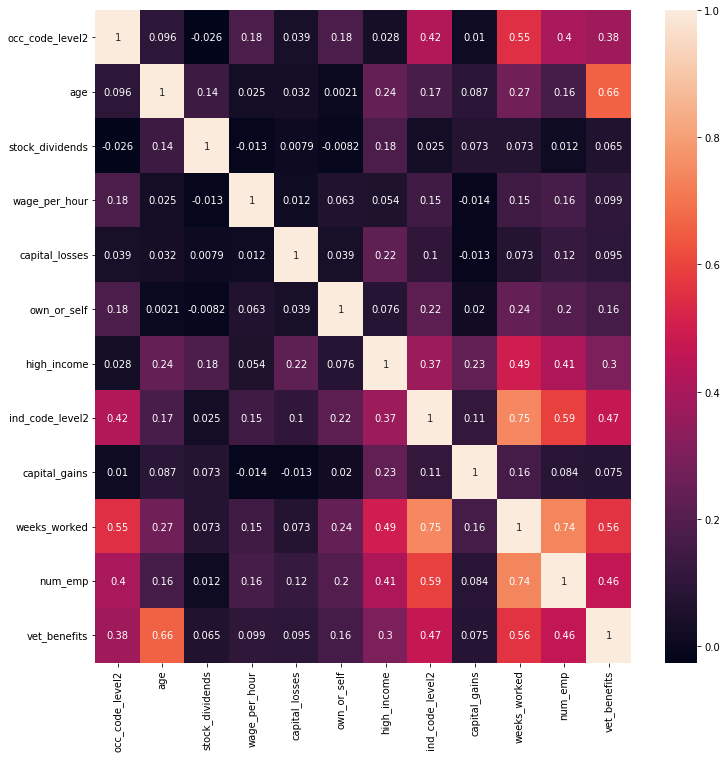

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(), annot = True)

Looking at the correlation matrix (only for numerical variables) we can see that there are some variables that are slightly correlated with the response variable (High income), at least more than other numerical variables, such as :
- num_emp: Number of other family members who are self employed (at 0.49)
- weeks_worked: The number weeks worked in the year (at 0.41)

In addition, ind_code_level2 has high correlation with weeks_worked and num_emp (at 0.75 and 0.59 respectively).

Now we will investigate the missing values in greater detail. We first see which are the absolute values of missing values for each variables:

In [20]:
# Train set
display("Missing values in train set: ", train_df.isnull().sum())

# Test set
display("Missing values in test set: ", test_df.isnull().sum())

'Missing values in train set: '

occ_code_level2         0
age                 24715
stock_dividends     24887
mig_chg_msa         27719
tax_filer_stat      25486
det_hh_summ             0
mig_prev_sunbelt    27719
hisp_origin           230
education           24821
wage_per_hour       24895
capital_losses      24757
vet_question            0
own_or_self             0
country_self         1075
mig_move_reg        27719
high_income             0
hs_college          24836
class_worker            0
mig_same                0
unemp_reason        24965
state_prev_res        184
ind_code_level2         0
race                24848
country_mother       1789
capital_gains       24891
sex                 24534
ind_code_level1         0
citizenship             0
union_member            0
fam_under_18            0
marital_stat        25481
region_prev_res         0
mig_chg_reg         27719
country_father       2026
occ_code_level1         0
full_or_part_emp        0
weeks_worked        24197
det_hh_fam_stat         0
num_emp     

'Missing values in test set: '

id                     0
occ_code_level2        0
age                 2709
stock_dividends     2727
mig_chg_msa         3071
tax_filer_stat      2819
det_hh_summ            0
mig_prev_sunbelt    3071
hisp_origin           22
education           2723
wage_per_hour       2761
capital_losses      2782
vet_question           0
own_or_self            0
country_self         108
mig_move_reg        3071
hs_college          2702
class_worker           0
mig_same               0
unemp_reason        2721
state_prev_res        25
ind_code_level2        0
race                2763
country_mother       185
capital_gains       2762
sex                 2754
ind_code_level1        0
citizenship            0
union_member           0
fam_under_18           0
marital_stat        2797
region_prev_res        0
mig_chg_reg         3071
country_father       217
occ_code_level1        0
full_or_part_emp       0
weeks_worked        2676
det_hh_fam_stat        0
num_emp                0
vet_benefits           0


Based on this we see that while there are variables that don't have any missing values, there are quite a few others that have a large number of missing values. Now we visualize the missing values on a heatmap to have a more global view:

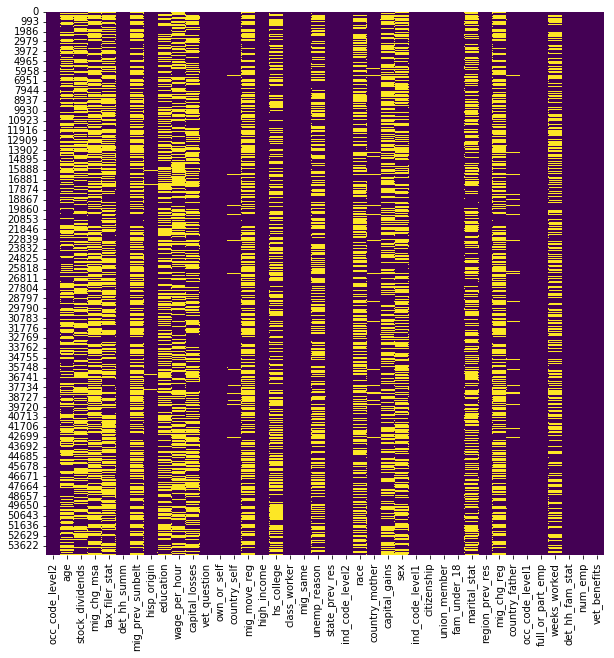

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train_df.isnull(), cbar = False, cmap='viridis') #there are a lot of missing values


We now look at the `missingno` correlation heatmap which measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

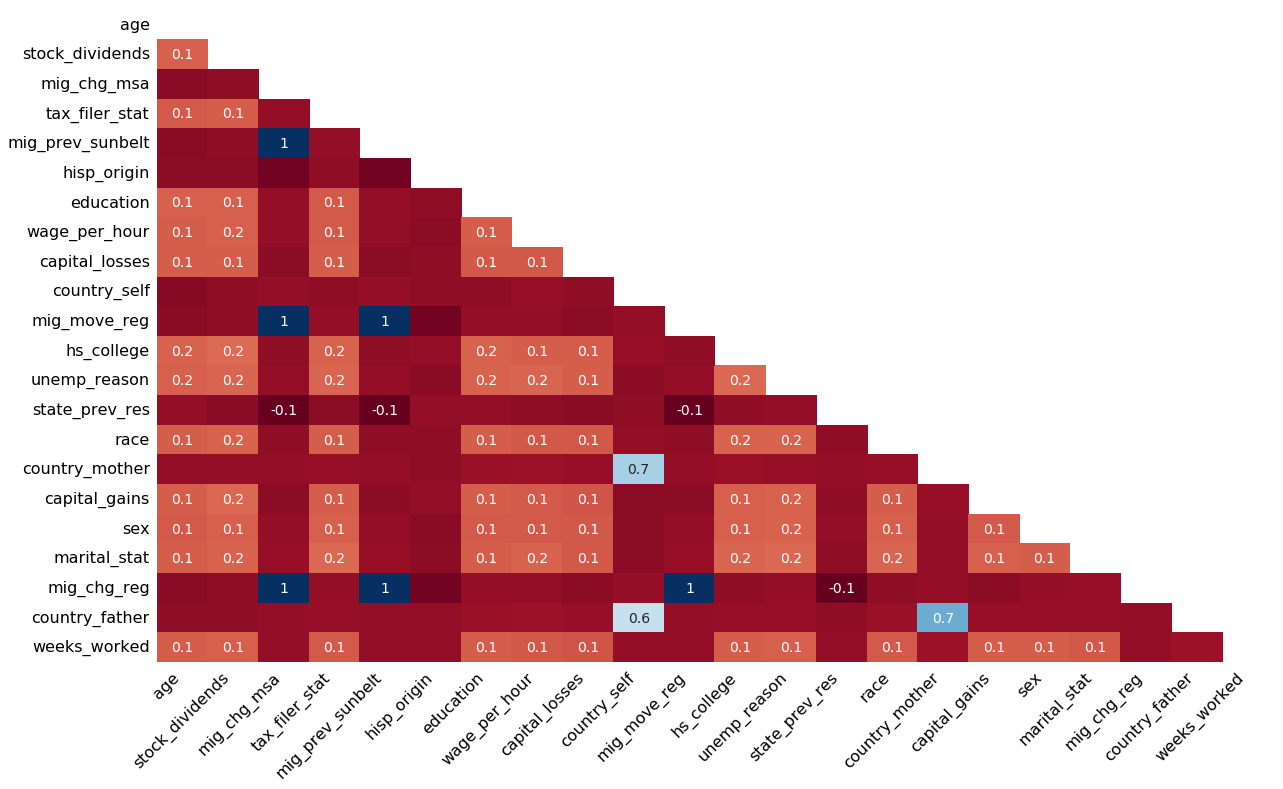

In [22]:
msno.heatmap(train_df)

Based on this heatmap, mig_chg_msa, mig_chg_reg, mig_prev_sunbelt, mig_move_reg don't seem to be missing at random. Based on our research, we learned that we should not delete data with missing values not at random as they could indicate some useful information for the model and removing them could lead to bias. [1] [2]

[1] https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=If%20the%20missing%20value%20is,useful%20data%20from%20the%20dataset. ,<br>
[2] https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/


We can see there are 19 variables with a significant number of missing values. We will treat these in the feature engineering section as well as in our baseline model's pipeline to see which imputing technique works best for each type of variables (numeric and categorical). 

We also notice there are quite a few “Not in Universe” values across the categorical variables. This implies that the person was not a part of the population to which the question was directed. Based on our research, the we could either have an option to exclude it from the analysis. But since we have quite a large number of these values, it doesn't really make sense if we drop all of them and significantly reducing the size of our training set and subsequently the test set. So we keep this value in the data and consider it as a separate class of value that might not add extra values. 

In [23]:
#Count the "Not in Universe" values in eligible columns
#in percentage with normalized = True

train_object = train_df.select_dtypes(include = 'object') #filter the dataframe based on data types of columns
    
for col in train_object.columns:
    if 'Not in universe' in train_object[col].unique():
        print('{} : {}'.format(col, train_object[col].value_counts(normalize=True)["Not in universe"]))
    elif 'Not in universe or children' in train_object[col].unique():
        print('{} : {}'.format(col, train_object[col].value_counts(normalize=True)["Not in universe or children"]))
    elif 'Not in universe under 1 year old' in train_object[col].unique():
        print('{} : {}'.format(col, train_object[col].value_counts(normalize=True)["Not in universe under 1 year old"]))

mig_chg_msa : 0.011492115441832788
mig_prev_sunbelt : 0.8571109788753347
vet_question : 0.9882432655154101
mig_move_reg : 0.011492115441832788
hs_college : 0.9482718081354338
class_worker : 0.3912502060175435
mig_same : 0.5132675298038712
unemp_reason : 0.9704473382362864
state_prev_res : 0.9327857707219375
ind_code_level1 : 0.3925504056256524
union_member : 0.8824692804951746
fam_under_18 : 0.7936711410625011
region_prev_res : 0.9296427197978281
mig_chg_reg : 0.011492115441832788
occ_code_level1 : 0.3925504056256524


**Now we look at the distribution of the response variable**

In [24]:
X_train = train_df.drop("high_income", axis = 1)
y_train = train_df["high_income"]

In [25]:
### Let's look at the distribution of high income 
print("Percentage of high income observations:", y_train.mean())
print("Percentage of low income observations:", 1-y_train.mean())

Percentage of high income observations: 0.307469738311938
Percentage of low income observations: 0.692530261688062


In [26]:
# Let's see how much high and low income we have
amount = pd.DataFrame({"count":train_df["high_income"].value_counts(), "group":["Low income","High income"]})
#amount
### Pie chart
fig = px.pie(amount, values="count", names="group", hole= 0.3,
       title='<b>Percentage of high income and low income',color = "group",labels="group",
      color_discrete_map={"Low income":"lightcyan","High income":"purple"})
fig.update_traces(hoverinfo='label+percent', textfont_size=14,textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width=2)))

fig.add_annotation(text='Income level',x=0.5,y=0.5,showarrow=False,font_size=14)

fig.show()

We see that more than 69 % of the observations have low income and 31 % have high income. It is a little bit unbalanced but it is okay as this is the reality of most real-life data. 

### Now we look at the potential relationships between categorical variables by conducting a Chi-square test:


In [27]:
#Regrouping the numerical and categorical features togheter:
cat_features = [i for i in X_train.columns if X_train[i].dtype.name == "object"]
num_features = [i for i in X_train.columns if X_train[i].dtype.name != "object"]

cat_features.append('vet_benefits') #we consider vet_benefit a categorical variable for the purpose of visualizing 
num_features.remove('vet_benefits')

display(cat_features)
display(num_features)

['mig_chg_msa',
 'tax_filer_stat',
 'det_hh_summ',
 'mig_prev_sunbelt',
 'hisp_origin',
 'education',
 'vet_question',
 'country_self',
 'mig_move_reg',
 'hs_college',
 'class_worker',
 'mig_same',
 'unemp_reason',
 'state_prev_res',
 'race',
 'country_mother',
 'sex',
 'ind_code_level1',
 'citizenship',
 'union_member',
 'fam_under_18',
 'marital_stat',
 'region_prev_res',
 'mig_chg_reg',
 'country_father',
 'occ_code_level1',
 'full_or_part_emp',
 'det_hh_fam_stat',
 'vet_benefits']

['occ_code_level2',
 'age',
 'stock_dividends',
 'wage_per_hour',
 'capital_losses',
 'own_or_self',
 'ind_code_level2',
 'capital_gains',
 'weeks_worked',
 'num_emp']

In [28]:
# Create X with only categorical data
X_train_cat = pd.DataFrame()
for i in cat_features:
    X_train_cat[i] = X_train[i]
    
# Apply label encoder
for i in X_train_cat.columns:
    X_train_cat[i] = LabelEncoder().fit_transform(X_train_cat[i])
    
chi_scores = chi2(X_train_cat,y_train)

p_values = pd.Series(chi_scores[1],index = X_train_cat.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.round(4)

region_prev_res     0.8200
vet_question        0.2278
mig_move_reg        0.0084
mig_chg_reg         0.0075
mig_same            0.0067
citizenship         0.0013
country_self        0.0003
state_prev_res      0.0000
mig_prev_sunbelt    0.0000
union_member        0.0000
mig_chg_msa         0.0000
country_mother      0.0000
country_father      0.0000
full_or_part_emp    0.0000
tax_filer_stat      0.0000
race                0.0000
hs_college          0.0000
marital_stat        0.0000
class_worker        0.0000
unemp_reason        0.0000
det_hh_summ         0.0000
occ_code_level1     0.0000
det_hh_fam_stat     0.0000
sex                 0.0000
ind_code_level1     0.0000
fam_under_18        0.0000
education           0.0000
hisp_origin         0.0000
vet_benefits        0.0000
dtype: float64

In [29]:
# Initialization of the matrix
chisqmatrix=pd.DataFrame(columns=X_train_cat.columns,index=X_train_cat.columns)
chisqmatrix

outercnt=0
innercnt=0
for icol in X_train_cat.columns:
    for jcol in X_train_cat.columns:
        
       mycrosstab=pd.crosstab(X_train_cat[icol],X_train_cat[jcol])
       #print (mycrosstab)
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
      
       #print (icol)
       #print (jcol)
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       #print (perexpected) 
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       #print (expected) 
       innercnt=innercnt+1
    #print (outercnt) 
    outercnt=outercnt+1
    innercnt=0
    
#Source code: https://github.com/shafqaatahmad/chisquare-test-heatmap/blob/main/Chi-Square%20test%20Heat%20Map.py

In [30]:
chisqmatrix = chisqmatrix.astype(float)
chisqmatrix

,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,vet_question,country_self,mig_move_reg,hs_college,class_worker,mig_same,unemp_reason,state_prev_res,race,country_mother,sex,ind_code_level1,citizenship,union_member,fam_under_18,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,det_hh_fam_stat,vet_benefits
mig_chg_msa,0.000,0.0,0.0,0.000,0.000,0.0,0.238,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
tax_filer_stat,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
det_hh_summ,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
mig_prev_sunbelt,0.000,0.0,0.0,0.000,0.000,0.0,0.172,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.020,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
hisp_origin,0.000,0.0,0.0,0.000,0.000,0.0,0.008,2.0,0.000,0.000,0.0,0.000,0.000,2.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
education,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,2.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
vet_question,0.238,0.0,0.0,0.172,0.008,0.0,0.000,1.0,0.262,0.000,0.0,0.323,0.005,0.914,0.0,0.046,0.000,0.0,0.0,0.057,0.0,0.0,0.549,0.366,0.724,0.0,0.0,0.0,0.000
country_self,0.000,0.0,0.0,0.000,2.000,0.0,1.000,0.0,0.000,0.000,0.0,0.000,0.000,2.000,0.0,2.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,2.000,0.0,0.0,2.0,0.000
mig_move_reg,0.000,0.0,0.0,0.000,0.000,0.0,0.262,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
hs_college,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.002,0.000,0.009,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.002,0.000,0.000,0.0,0.0,0.0,0.000


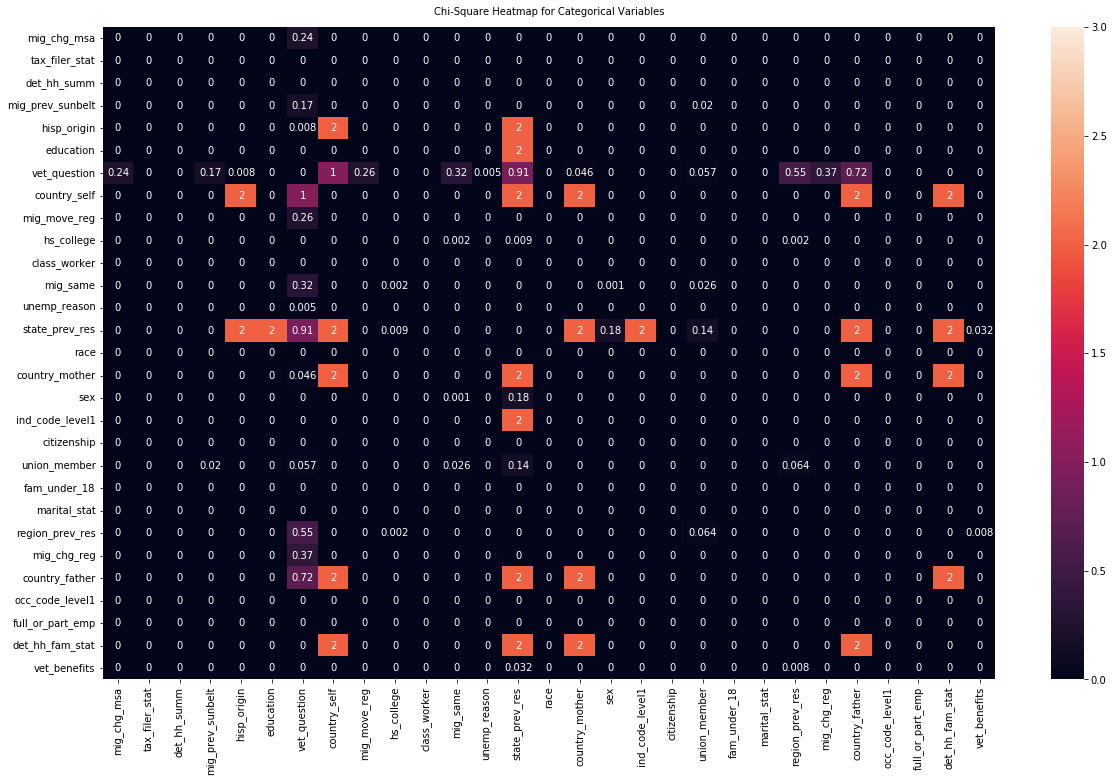

In [31]:
plt.figure(figsize=(20, 12))
chi_square_heatmap = sns.heatmap(chisqmatrix, vmin=0, vmax=3, annot=True)
chi_square_heatmap.set_title('Chi-Square Heatmap for Categorical Variables', fontdict={'fontsize':10}, pad=12);

**Explanation why we have '2' in the Heatmap:**<br>

The value “2” above is assigned to those variables where the expected frequency is less than 20% so we can not make any decision about those variables. To be on the safe side we can keep them. Such a situation occurs when there are too many levels within data. One workaround to avoid this situation is by combining different levels within the same category variable. We will do this in the following section of the report with variables where '2' appears.

**Observation:** 
We have `vet_question` seems to be highly associated with a large number of variables, like `country_self`, `state_prev_res` and `country_father`. We could consider dropping this variable.


In [32]:
display(list(enumerate(cat_features)))
display(list(enumerate(num_features)))

[(0, 'mig_chg_msa'),
 (1, 'tax_filer_stat'),
 (2, 'det_hh_summ'),
 (3, 'mig_prev_sunbelt'),
 (4, 'hisp_origin'),
 (5, 'education'),
 (6, 'vet_question'),
 (7, 'country_self'),
 (8, 'mig_move_reg'),
 (9, 'hs_college'),
 (10, 'class_worker'),
 (11, 'mig_same'),
 (12, 'unemp_reason'),
 (13, 'state_prev_res'),
 (14, 'race'),
 (15, 'country_mother'),
 (16, 'sex'),
 (17, 'ind_code_level1'),
 (18, 'citizenship'),
 (19, 'union_member'),
 (20, 'fam_under_18'),
 (21, 'marital_stat'),
 (22, 'region_prev_res'),
 (23, 'mig_chg_reg'),
 (24, 'country_father'),
 (25, 'occ_code_level1'),
 (26, 'full_or_part_emp'),
 (27, 'det_hh_fam_stat'),
 (28, 'vet_benefits')]

[(0, 'occ_code_level2'),
 (1, 'age'),
 (2, 'stock_dividends'),
 (3, 'wage_per_hour'),
 (4, 'capital_losses'),
 (5, 'own_or_self'),
 (6, 'ind_code_level2'),
 (7, 'capital_gains'),
 (8, 'weeks_worked'),
 (9, 'num_emp')]

Now we look at visualizing our variables:

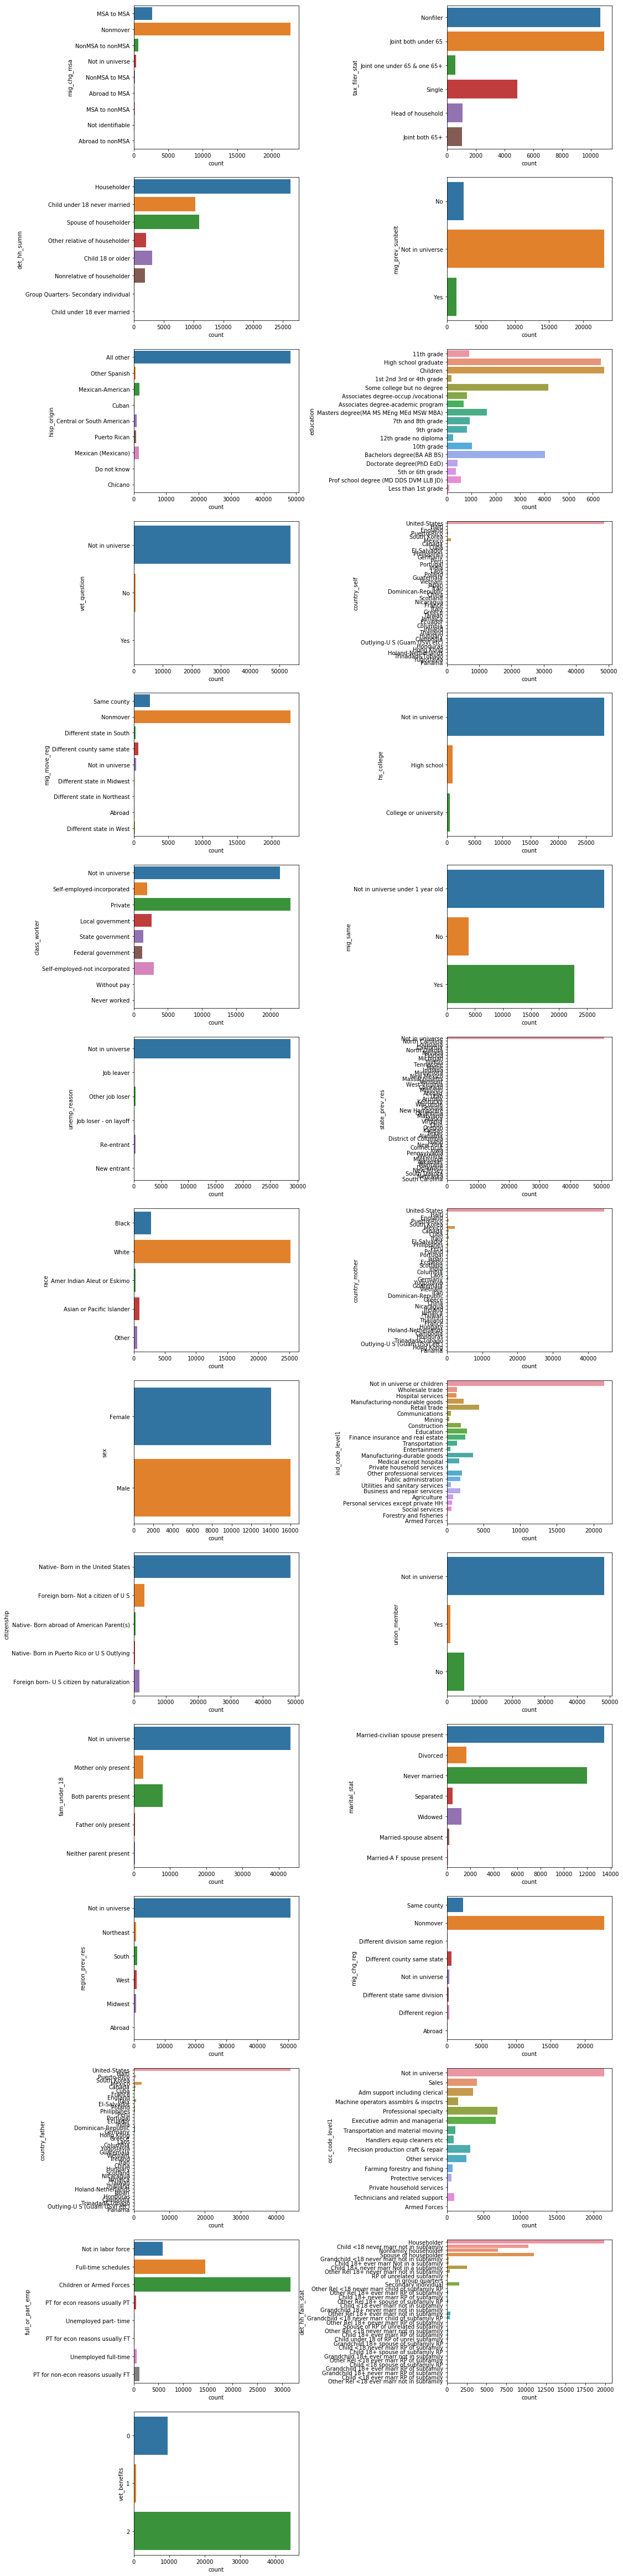

In [33]:
# Create plots for categorical variables

plt.figure(figsize = (15,80))
plt.subplots_adjust(left = 0.1,
                    bottom=0.1,  
                    top=0.9, 
                    wspace=0.9)
for i in enumerate(cat_features):
    plt.subplot(15, 2, i[0]+1)
    sns.countplot( y= i[1], data = train_df)
    

occ_code_level2  Is right skewed
stock_dividends  Is right skewed
wage_per_hour  Is right skewed
capital_losses  Is right skewed
own_or_self  Is right skewed
ind_code_level2  Is right skewed
capital_gains  Is right skewed
num_emp  Is right skewed


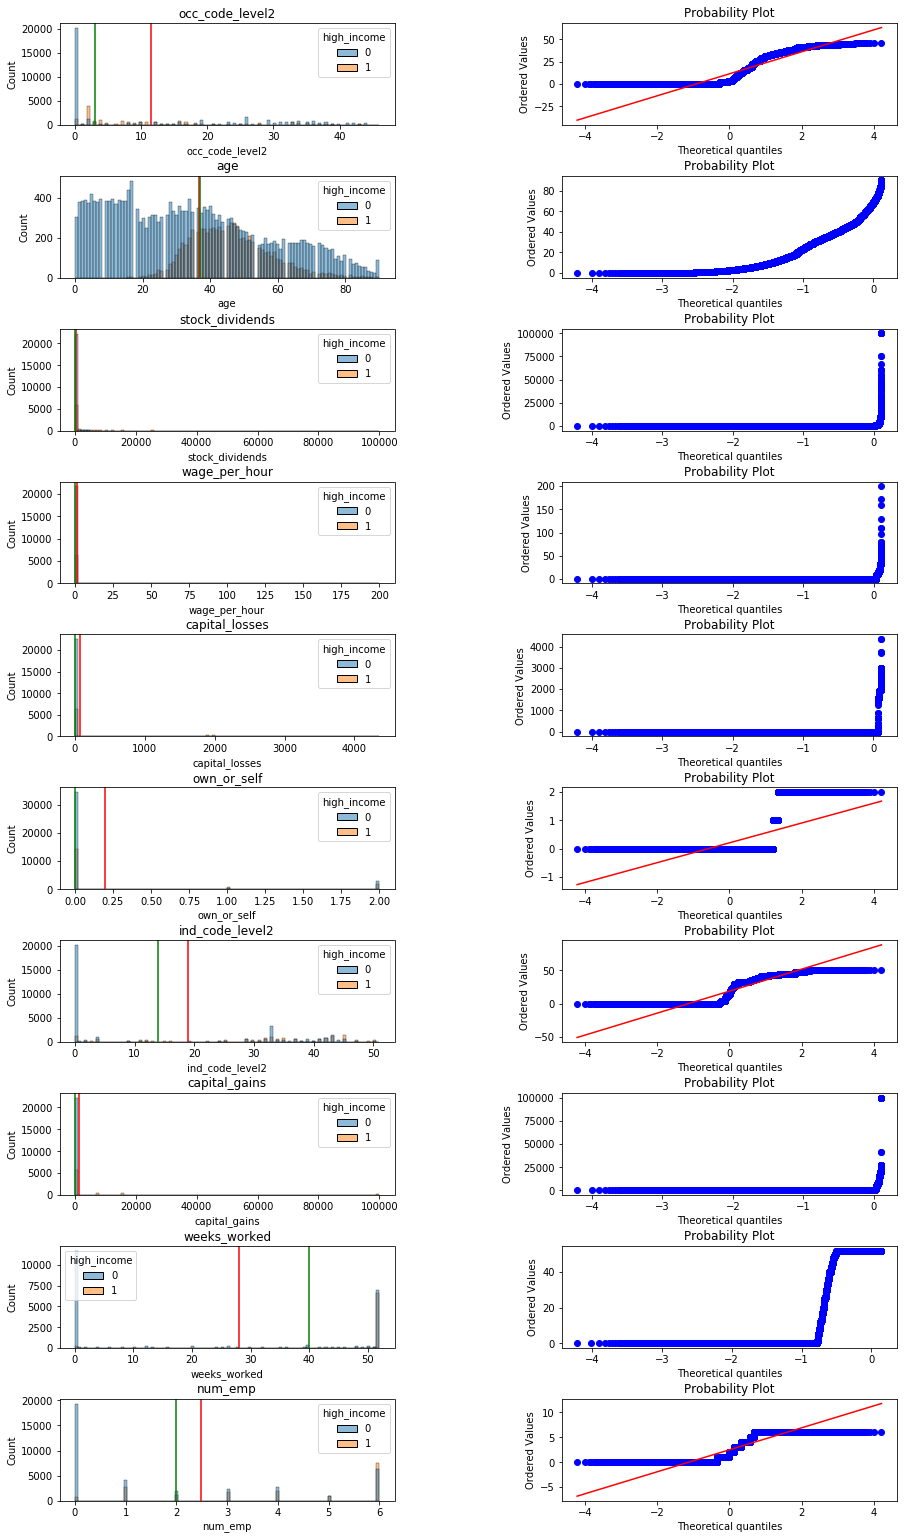

In [34]:
%matplotlib inline
plt.figure(figsize=(15,30))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
i = 1
for ind, col in enumerate(num_features) : 
    
    plt.subplot(11,2, i)
    sns.histplot(data = train_df, hue = "high_income", x = col, legend=True,bins=100)
    plt.title(col)
    plt.axvline(train_df[col].mean(), color = "red", label = "Mean")
    plt.axvline(train_df[col].median(), color = "green", label = "Median")
    i+= 1
    plt.subplot(11,2, i)
    stats.probplot(train_df[col], dist="norm", plot=pylab)
    i+=1
    if train_df[col].mean() > train_df[col].median():
        print(col, " Is right skewed")
        
#https://www.kaggle.com/code/prashant111/a-reference-guide-to-feature-engineering-methods/notebook#5.-Variable-Transformation-   

Based on the visualization of the numerical variables, we have some of them quite skewed in distribution. We will proceed to do a log transformation of these variables in the following section to see if their distribution improved.

## 2.2.Feature Engineering:

In [35]:
# Generate copies of the train and test set for feature engineering

processed_train = train_df.copy()
processed_test = test_df.copy()

Trasforming categorical variables:

In [36]:
# Drop state_prev_res as region_prev_res is a proxy for this variable
#as well as vet_question, as identified from the chi-square plot above
processed_train = processed_train.drop(columns = ["state_prev_res", "vet_question"])
processed_test = processed_test.drop(columns = ["state_prev_res", "vet_question"])

In [37]:
# Drop ind_code_level1 as this variable is ind_code_level 2 is more detailed,
#numeric and is also a proxy for ind_code_level1
processed_train = processed_train.drop(columns = "ind_code_level1")
processed_test = processed_test.drop(columns = "ind_code_level1")

Now we process the country variables (`country_self`, `country_mother` and `country_father`) since, as seen in the visualized plots above, apart from the United-States, they have numerous other countries with low observations and we thought we might be able to group them into 1 group `Abroad`.


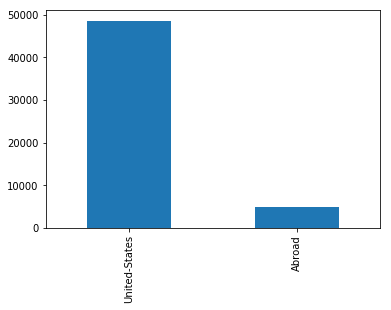

In [38]:
columns = ['country_self', 'country_mother', 'country_father']

for i in range(len(columns)):
    processed_train.loc[(processed_train[columns[i]] != "United-States") & (processed_train[columns[i]].isnull() == False), columns[i]] = "Abroad"
    processed_test.loc[(processed_test[columns[i]] != "United-States") & (processed_test[columns[i]].isnull() == False), columns[i]] = "Abroad"

display(processed_train[columns[0]].value_counts().plot(kind='bar'))

Now we process the variable `hisp_origin`, since as seen in the visualized plots above, we saw that this variable also has categories with few observations and might more or less be grouped into new broader categories that represent more or less the same idea.

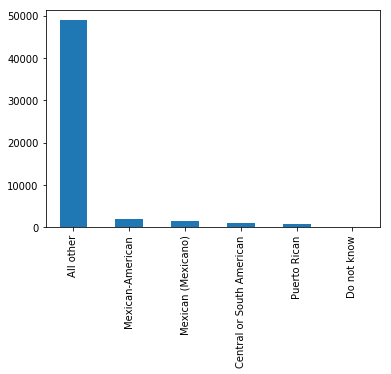

In [39]:
#Process hisp_origin

#train set
processed_train.loc[(processed_train["hisp_origin"] == "Cuban") & (processed_train["hisp_origin"].isnull() == False), "hisp_origin"] = "Central or South American"
processed_train.loc[(processed_train["hisp_origin"] == "Other Spanish") & (processed_train["hisp_origin"].isnull() == False), "hisp_origin"] = "All other"
processed_train.loc[(processed_train["hisp_origin"] == "Chicano") & (processed_train["hisp_origin"].isnull() == False), "hisp_origin"] = "Mexican-American"

processed_test.loc[(processed_test["hisp_origin"] == "Cuban") & (processed_test["hisp_origin"].isnull() == False), "hisp_origin"] = "Central or South American"
processed_test.loc[(processed_test["hisp_origin"] == "Other Spanish") & (processed_test["hisp_origin"].isnull() == False), "hisp_origin"] = "All other"
processed_test.loc[(processed_test["hisp_origin"] == "Chicano") & (processed_test["hisp_origin"].isnull() == False), "hisp_origin"] = "Mexican-American"


processed_train["hisp_origin"].value_counts().plot(kind='bar')

For variable `class_worker` and `det_hh_fam_stat`, we will do the same thing, e.g. grouping some categories into a broader categories to reduce the dimension expansion when feed these into the pipeline with OneHotEncoding processing. 

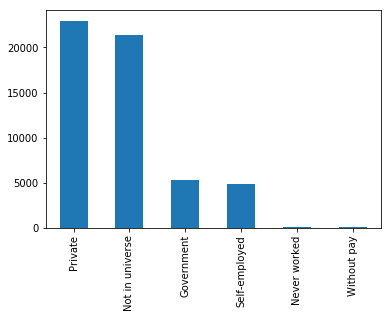

In [40]:
# Process class_worker to group all government workers together

#train set
processed_train.loc[(processed_train["class_worker"] == "Local government") | (processed_train["class_worker"] == "Federal government") | (processed_train["class_worker"] == "State government"), "class_worker"] = "Government"
processed_train.loc[(processed_train["class_worker"] == "Self-employed-not incorporated") | (processed_train["class_worker"] == "Self-employed-incorporated"), "class_worker"] = "Self-employed"

#test set
processed_test.loc[(processed_test["class_worker"] == "Local government") | (processed_test["class_worker"] == "Federal government") | (processed_test["class_worker"] == "State government"), "class_worker"] = "Government"
processed_test.loc[(processed_test["class_worker"] == "Self-employed-not incorporated") | (processed_test["class_worker"] == "Self-employed-incorporated"), "class_worker"] = "Self-employed"

processed_train["class_worker"].value_counts().plot(kind='bar')

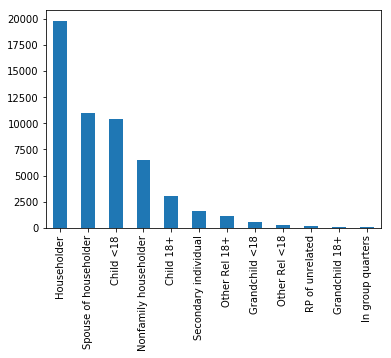

In [41]:
# Process variable det_hh_fam_stat

new_col = []
for i in processed_train["det_hh_fam_stat"]:
    if "Child 18+" in i:
        new_col.append("Child 18+")
    elif "Child <18" in i or "Child under 18" in i:
        new_col.append("Child <18")
    elif "Grandchild 18+" in i:
        new_col.append("Grandchild 18+")
    elif "Grandchild <18" in i:
        new_col.append("Grandchild <18")
    elif "Householder" in i:
        new_col.append(i)
    elif "In group quarters" in i:
        new_col.append(i)
    elif "Nonfamily householder" in i:
        new_col.append(i)
    elif "Other Rel 18+" in i:
        new_col.append("Other Rel 18+")
    elif "Other Rel <18" in i:
        new_col.append("Other Rel <18")
    elif "RP of unrelated" in i:
        new_col.append("RP of unrelated")
    elif "Spouse of RP" in i:
        new_col.append("Spouse of RP")
    elif "Spouse of householder" in i:
        new_col.append("Spouse of householder")
        
    else : 
        new_col.append(i)

processed_train['det_hh_fam_stat'] = new_col

new_col = []
for i in processed_test["det_hh_fam_stat"]:
    if "Child 18+" in i:
        new_col.append("Child 18+")
    elif "Child <18" in i or "Child under 18" in i:
        new_col.append("Child <18")
    elif "Grandchild 18+" in i:
        new_col.append("Grandchild 18+")
    elif "Grandchild <18" in i:
        new_col.append("Grandchild <18")
    elif "Householder" in i:
        new_col.append(i)
    elif "In group quarters" in i:
        new_col.append(i)
    elif "Nonfamily householder" in i:
        new_col.append(i)
    elif "Other Rel 18+" in i:
        new_col.append("Other Rel 18+")
    elif "Other Rel <18" in i:
        new_col.append("Other Rel <18")
    elif "RP of unrelated" in i:
        new_col.append("RP of unrelated")
    elif "Spouse of RP" in i:
        new_col.append("Spouse of RP")
    elif "Spouse of householder" in i:
        new_col.append("Spouse of householder")
        
    else : 
        new_col.append(i)

processed_test['det_hh_fam_stat'] = new_col

processed_train['det_hh_fam_stat'].value_counts().plot(kind='bar');

For the existing missing values, we will be treating them in the pipeline of each model through Ordinal Encoding, One-Hot Encording and the best imputation method determined through in a `for` loop comparing the different imputation methods.


Transforming numerical variables:

In [42]:
#Log transformation with a small constant being added to deal with 0 values in the data set.

for i in range(len(num_features)):
    processed_train[num_features[i]] = np.log(processed_train[num_features[i]]+1)
    processed_test[num_features[i]] = np.log(processed_test[num_features[i]]+1)
        
        

In [43]:
# Look at final processed data set
display(processed_train.head())
display(processed_test.head())

,occ_code_level2,age,stock_dividends,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,wage_per_hour,capital_losses,own_or_self,country_self,mig_move_reg,high_income,hs_college,class_worker,mig_same,unemp_reason,ind_code_level2,race,country_mother,capital_gains,sex,citizenship,union_member,fam_under_18,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,weeks_worked,det_hh_fam_stat,num_emp,vet_benefits
0,0.000000,3.761200,0.0,NaN,Nonfiler,Householder,NaN,All other,11th grade,0.0,NaN,0.000000,United-States,NaN,0,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0.000000,Black,United-States,0.0,Female,Native- Born in the United States,Not in universe,Not in universe,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.0,Householder,0.000000,2
1,2.944439,4.043051,NaN,NaN,NaN,Householder,NaN,All other,High school graduate,0.0,NaN,1.098612,United-States,NaN,1,Not in universe,Self-employed,Not in universe under 1 year old,NaN,3.496508,NaN,United-States,NaN,Male,Native- Born in the United States,Not in universe,Not in universe,Married-civilian spouse present,Not in universe,NaN,United-States,Sales,Full-time schedules,NaN,Householder,0.693147,2
2,3.295837,3.295837,NaN,NaN,Joint both under 65,Householder,NaN,All other,High school graduate,0.0,NaN,0.000000,Abroad,NaN,0,Not in universe,Private,Not in universe under 1 year old,NaN,3.737670,NaN,Abroad,NaN,NaN,Foreign born- Not a citizen of U S,Not in universe,Not in universe,NaN,Not in universe,NaN,Abroad,Adm support including clerical,Full-time schedules,NaN,Householder,1.386294,2
3,0.000000,4.219508,NaN,MSA to MSA,Joint one under 65 & one 65+,Householder,No,All other,NaN,0.0,NaN,0.000000,United-States,Same county,0,Not in universe,Not in universe,No,NaN,0.000000,Black,United-States,0.0,NaN,Native- Born in the United States,Not in universe,Not in universe,NaN,Northeast,Same county,United-States,Not in universe,Children or Armed Forces,0.0,Householder,0.000000,1
4,0.000000,NaN,NaN,Nonmover,Nonfiler,Child under 18 never married,Not in universe,All other,Children,0.0,0.0,0.000000,United-States,Nonmover,0,Not in universe,Not in universe,Yes,Not in universe,0.000000,White,United-States,0.0,Female,Native- Born in the United States,Not in universe,Mother only present,NaN,Not in universe,Nonmover,United-States,Not in universe,Children or Armed Forces,NaN,Child <18,0.000000,0


,id,occ_code_level2,age,stock_dividends,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,wage_per_hour,capital_losses,own_or_self,country_self,mig_move_reg,hs_college,class_worker,mig_same,unemp_reason,ind_code_level2,race,country_mother,capital_gains,sex,citizenship,union_member,fam_under_18,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,weeks_worked,det_hh_fam_stat,num_emp,vet_benefits
0,1,0.000000,NaN,NaN,NaN,NaN,Householder,NaN,All other,NaN,0.0,NaN,0.000000,United-States,NaN,NaN,Not in universe,Not in universe under 1 year old,NaN,0.000000,NaN,United-States,NaN,NaN,Native- Born in the United States,Not in universe,Not in universe,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.000000,Householder,0.000000,2
1,2,3.465736,NaN,6.566672,NaN,Joint both under 65,Spouse of householder,NaN,Mexican-American,9th grade,0.0,0.0,0.000000,Abroad,NaN,Not in universe,Private,Not in universe under 1 year old,Not in universe,3.688879,White,Abroad,NaN,NaN,Foreign born- Not a citizen of U S,Not in universe,Not in universe,Married-A F spouse present,Not in universe,NaN,Abroad,Other service,Not in labor force,NaN,Spouse of householder,1.945910,2
2,3,3.526361,NaN,NaN,NaN,Single,Child 18 or older,NaN,All other,NaN,NaN,NaN,0.000000,United-States,NaN,Not in universe,Private,Not in universe under 1 year old,NaN,1.609438,White,United-States,NaN,Male,Native- Born in the United States,No,Not in universe,NaN,Not in universe,NaN,United-States,Precision production craft & repair,Full-time schedules,3.970292,Child 18+,1.386294,2
3,4,1.098612,3.988984,0.000000,Nonmover,NaN,Spouse of householder,Not in universe,All other,High school graduate,NaN,NaN,0.000000,United-States,Nonmover,NaN,Self-employed,Yes,NaN,3.828641,NaN,United-States,0.0,Female,Native- Born in the United States,Not in universe,Not in universe,Married-civilian spouse present,Not in universe,Nonmover,United-States,Executive admin and managerial,Children or Armed Forces,3.970292,Spouse of householder,0.693147,2
4,5,3.806662,NaN,NaN,NaN,Single,Child 18 or older,NaN,Central or South American,NaN,0.0,0.0,1.098612,United-States,NaN,NaN,Private,Not in universe under 1 year old,Not in universe,0.693147,Black,United-States,NaN,Male,Native- Born in the United States,Not in universe,Not in universe,Never married,Not in universe,NaN,United-States,Farming forestry and fishing,Full-time schedules,3.970292,Child 18+,1.791759,2


occ_code_level2  Is right skewed
stock_dividends  Is right skewed
wage_per_hour  Is right skewed
capital_losses  Is right skewed
own_or_self  Is right skewed
capital_gains  Is right skewed


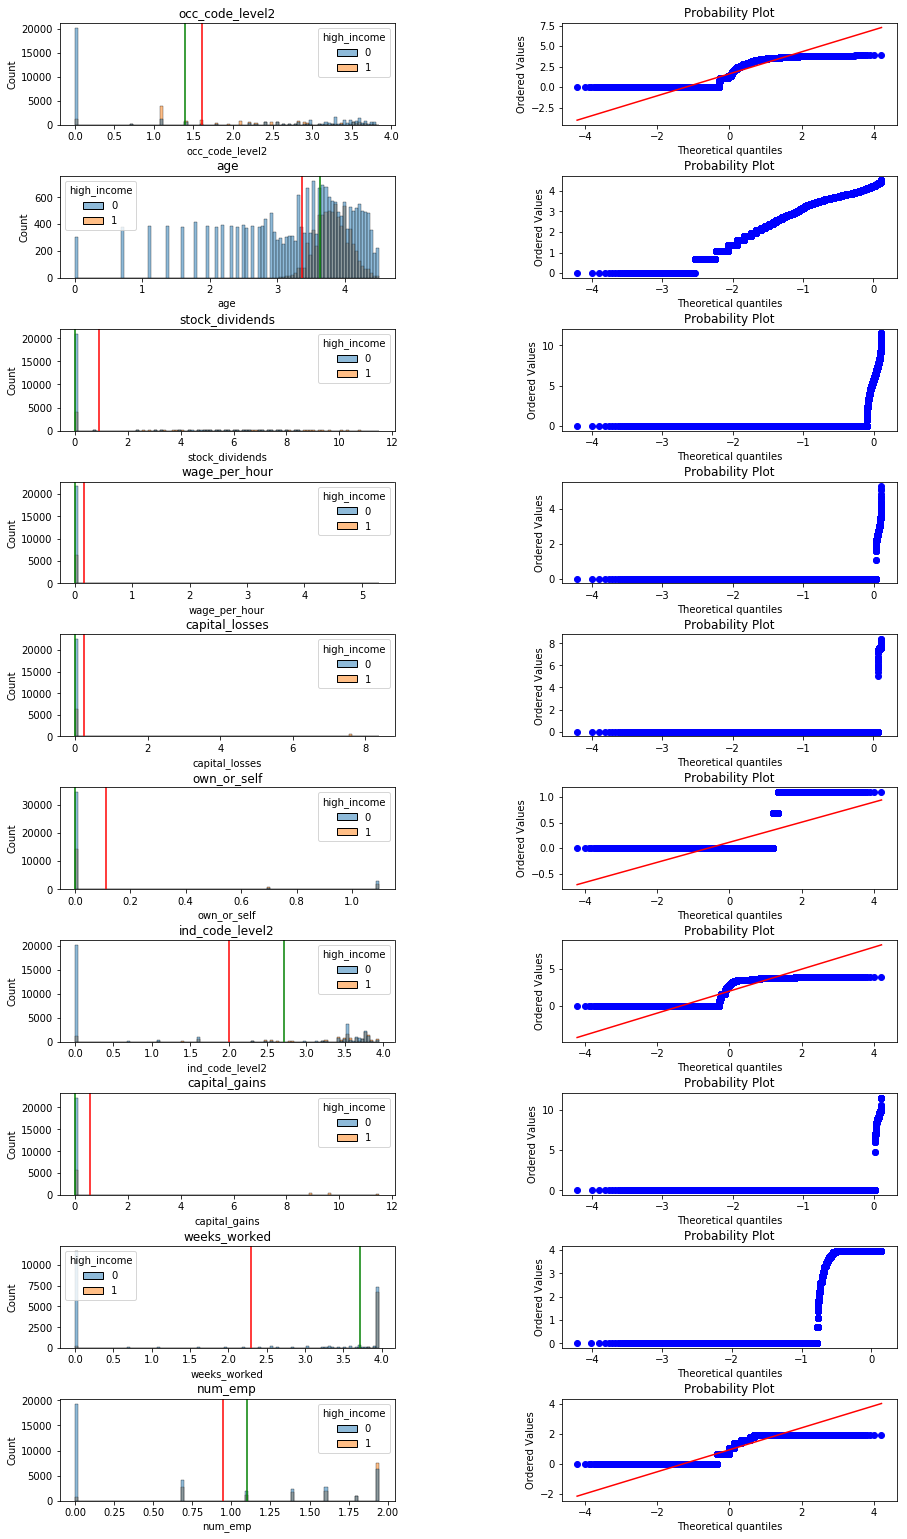

In [44]:
%matplotlib inline
plt.figure(figsize=(15,30))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
i = 1
for ind, col in enumerate(num_features) : 
    
    plt.subplot(11,2, i)
    sns.histplot(data = processed_train, hue = "high_income", x = col, legend=True,bins=100)
    plt.title(col)
    plt.axvline(processed_train[col].mean(), color = "red", label = "Mean")
    plt.axvline(processed_train[col].median(), color = "green", label = "Median")
    i+= 1
    plt.subplot(11,2, i)
    stats.probplot(processed_train[col], dist="norm", plot=pylab)
    i+=1
    if processed_train[col].mean() > processed_train[col].median():
        print(col, " Is right skewed")

After the log transformation, we notice that some variables have increased in distribution while most of them are still not improved. 

In [45]:
# Exported processed data to new csv files

processed_train.to_csv("processed_train.csv")
processed_test.to_csv("processed_test.csv")

In order to find the best imputation method, we will use a baseline model, here Logistic Regression, since it is a simple model and it doesn't require any tuning parameter. We will judge the overall imputation method on the cross-validation accuracy and keep only the ones that yield the best accuracy score.  Furthermore, we will use the original dataset and the one that we have created by reducing the dimension of some features in order to compare them to see which one we should pick to continue our analysis.

#### Loading the new datsets

In [46]:
#Loading the data :
#-original dataset
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

#- new processed dataset :
train_df2 = pd.read_csv("processed_train.csv")
test_df2 = pd.read_csv("processed_test.csv")

#####  Cleaning the data ######

#removing id for train_df
train_df.drop("id", axis = 1, inplace = True)
train_df2.drop("Unnamed: 0", axis = 1, inplace = True)


##### Transforming object into categories #####
# for train
for i in train_df.columns:
    if train_df[i].dtypes == "object":
        train_df[i] = train_df[i].astype("category")
# For test
for i in test_df.columns:
    if test_df[i].dtypes == "object":
        test_df[i] = test_df[i].astype("category")
        
## same for new dataset       
# for train
for i in train_df2.columns:
    if train_df2[i].dtypes == "object":
        train_df2[i] = train_df2[i].astype("category")
# For test
for i in test_df2.columns:
    if test_df2[i].dtypes == "object":
        test_df2[i] = test_df2[i].astype("category")


#### Splitting the datasets and preparing them for the modelling part : 

In [47]:
X = train_df.drop("high_income", axis = 1)
y = train_df["high_income"]

X1 = train_df2.drop("high_income", axis = 1)
y1 = train_df2["high_income"]

#### Grouping our features that are categories in one vector, Same for numeric #### 

#Original dataset
categorical_features = [i for i in X.columns if X[i].dtype.name == "category"]
numerical_features = [i for i in X.columns if X[i].dtype.name != "category"]


#Testing with the new dataset that was created and creating the groups and order for our ordinal variables
categorical_features2 = [i for i in X1.columns if X1[i].dtype.name == "category"]
numerical_features2 = [i for i in X1.columns if X1[i].dtype.name != "category"]
ordinal = ["education", "hs_college", "class_worker", "full_or_part_emp"]
categorical_features2.remove("education")
categorical_features2.remove("hs_college")
categorical_features2.remove("class_worker")
categorical_features2.remove("full_or_part_emp")

order_educ = ["Missing",'Children',
    'Less than 1st grade',
    '1st 2nd 3rd or 4th grade',
    '5th or 6th grade',
    '7th and 8th grade',
    '9th grade',
    '10th grade',
    '11th grade',
    '12th grade no diploma',
    'High school graduate',
    'Associates degree-occup /vocational',
    'Associates degree-academic program',
    'Some college but no degree',
    'Bachelors degree(BA AB BS)',
    'Masters degree(MA MS MEng MEd MSW MBA)',
    'Prof school degree (MD DDS DVM LLB JD)',
    'Doctorate degree(PhD EdD)']

order_hs_college = ["Missing",
                    "Not in universe", 
                    "High school", 
                    "College or university"]

order_class_worker = ['Not in universe',
                      'Never worked',
                      'Without pay',
                      'Self-employed',
                      'Government',
                      'Private']                      

order_full_or_part_emp = ['Not in labor force', 
                          'Children or Armed Forces',
                          'Unemployed full-time',
                          'Unemployed part- time',
                          'PT for econ reasons usually PT',
                          'PT for econ reasons usually FT',
                          'PT for non-econ reasons usually FT',
                          'Full-time schedules']


**Missing value imputation:** Now that everything is in place, we will first perform and see how what imputation works best for the original dataset. 

In order to do that, we will create a pipeline that takes the numerical variables and impute the missing values by wither the mean or the median. It will then scale them using standard scaler. 

Regarding the categorical variables, we will impute the missing values by either the most frequent class or by just creating a constant called "missing". For the first case we will not consider using ordinal variables (we tried with ordinal and without and it decreased the accuracy). 

We will then regroup this processing into a logistic regression and perform a 5-fold Cross-Validation to have an idea of how these imputation methods perform next to each other. 

In [48]:
### What is the best imputaiton method ? let's try some and evaluate using cross-validation
logi_res = {}
for i in ("mean","median"):
    
    numeric_transformer = Pipeline(
        steps=[("imputer_num", SimpleImputer(strategy=i)), ("scaler", StandardScaler())]
    )
    for j in ("most_frequent","constant"):
        if j == "most_frequent" : 
            categorical_transformer = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer, numerical_features),
                    ("cat", categorical_transformer, categorical_features),
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -1, verbose=2).mean()
            logi_res[(i,j)] = score
        else : 
            categorical_transformer = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer, numerical_features),
                    ("cat", categorical_transformer, categorical_features),
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -1, verbose=2).mean()
            logi_res[(i,j)] = score


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.9s remaining:   35.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.7s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

In [49]:
logi_res

{('mean', 'most_frequent'): 0.8556411236356608,
 ('mean', 'constant'): 0.856868095703087,
 ('median', 'most_frequent'): 0.854981900359092,
 ('median', 'constant'): 0.856428585573061}

We can clearly see that the mean imputation for numerical values and the constant imputation for categorical values is the best methods since it maximizes the accuracy ! Now let's see how we perform on the new processed dataset that we have created. For this case we will also treat ordinal values using ordinal encoder.

In [50]:
logi_res = {}

for i in ("mean","median"):
    
    numeric_transformer2 = Pipeline(
        steps=[("imputer_num", SimpleImputer(strategy=i)), ("scaler", StandardScaler())]
    )
    for j in ("most_frequent","constant"):
        if j == "most_frequent" : 
            categorical_transformer2 = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )
            
            ordinal_transfomer = Pipeline(
            steps=[("imputer_ord", SimpleImputer(strategy="constant", fill_value= "Missing")), 
           #filling in missing value as "Missing" in the ordinal code and unknown value as -1
          ("ordinal_enc",OrdinalEncoder(categories=[order_educ, order_hs_college, order_class_worker, order_full_or_part_emp], handle_unknown="use_encoded_value", unknown_value = -1)),
          ("scaler2", StandardScaler())])

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer2, numerical_features2),
                    ("cat", categorical_transformer2, categorical_features2),
                    ("ord",ordinal_transfomer,ordinal)
                    
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X1, y1, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -1, verbose=2).mean()
            logi_res[(i,j)] = score
        else : 
            categorical_transformer2 = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )
            
            ordinal_transfomer = Pipeline(
            steps=[("imputer_ord", SimpleImputer(strategy="constant", fill_value= "Missing")), 
           #filling in missing value as "Missing" in the ordinal code and unknown value as -1
          ("ordinal_enc",OrdinalEncoder(categories=[order_educ, order_hs_college, order_class_worker, order_full_or_part_emp], handle_unknown="use_encoded_value", unknown_value = -1)),
          ("scaler2", StandardScaler())])

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer2, numerical_features2),
                    ("cat", categorical_transformer2, categorical_features2),
                    ("ord",ordinal_transfomer,ordinal)
                    
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X1, y1, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -2,verbose=2).mean()
            logi_res[(i,j)] = score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    6.8s finished


In [51]:
logi_res

{('mean', 'most_frequent'): 0.8439760165317056,
 ('mean', 'constant'): 0.8461368717530059,
 ('median', 'most_frequent'): 0.8441042065671119,
 ('median', 'constant'): 0.8458988016699849}

We can see that the accuracy of our processed dataset using the Logistic Regression has decreased compare to our first model. 

Although the decrease in accuracy does not seem too significant (around 1%), for the purpose of competing in the Kaggle competition where the each percentage point of the accuracy score matters on the leaderboard, we consider using the first pipeline with the original dataset where all information is captured withouth the feature engineering that we have done above. 

However, we do take note that, if not for the Kaggle competition, we would opt for the feature-engineered data set for efficiency and reduction in computational power while still generating close results.

## 3. Comparison of different methods, tuning parameters analysis, model selection approach

Now that we have appropriately analyzed the data in a first step and presented our chosen best model, we will walk you through the different models that we used on the data set and compare their performance to see which one performs better. In particular, we had a look at the following models:

1 - kNN <br>
2.1 - LDA <br>
2.2 - QDA <br>
3.1 - Logistic Regression (Ridge) <br>
3.2 - Logistic Regression (Lasso) <br>
4 - Single Classification Tree <br>
5.1 - Bagging (Trees) <br>
5.2 - Random Forest <br>
6 - Boosting (Trees) <br>
7 - SVM <br>
8 - Neural Net (on sklearn and tensorflow/keras) <br>
9 - Stacking (Ensembles method) <br>

We will evaluate the performance of these models based on the 5-fold cross-validation accuracy score. We decided to use 5 since it requires less models to be fitted which decreases the time spent on each model.
Let's discuss each of these models.

#### 1.	kNN (Notebook #1)
Let's first start with kNN. It is a non-parametric method that has a tuning parameter (k) that indicates the number of nearest neighbors that will decide on how a new observation will be classified. It uses the Euclidean distance to determine if an observation is close to other ones. The complexity of the model increases when K is small and decreases when K is large. Since it uses the Euclidean distance, it is important to first scale our data in order for all variables to be considered the same way during the Euclidean distance computation. In order to choose the appropriate number of neighbours, we used a GridSearch ranging from 1 to 49.

The best CV score (based on the one standard rule) was **0.841339**, with k = 27 neighbours.

However, because kNN performs worse than the Baseline model (simple Logistic Regression), we did not even try to submit the predictions on Kaggle, and we do not further consider the model. You can retrieve the work in Notebook #1. Furthermore, our dataset has a lot of variables and mostly because we used one-hot encoder that creates a lot of dummy variables, increasing the dimension of our dataset. This is problematic for this model since is uses the Euclidean distance and is subject to what is called the “curse of dimensionality”. Having a lot of variables makes it hard for the algorithm to determine accurately how close an observation is to another meaning that it will affect the quality of the predictions and it was the case. For this reason, we will try other models that are probably better for this dataset.

#### 2.1.	LDA (Notebook #2)
Then, we tried a Linear Discriminant Analysis (LDA). LDA is used to find a linear decision boundary between classifiers, it makes predictions by estimating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class and a prediction is made. The model uses Bayes Theorem to estimate the probabilities.

In order to select an appropriate model, we performed a GridSearch for the shrinkage parameter (0, 0.1, ..., 0.9, 1).
The best CV score was **0.849543**, with a shrinkage parameter of 0.1.
Again, because the model performs quite poorly compared to the Baseline model and the other models, we did not try to submit the predictions for the test set on Kaggle. You can still retrieve the work in Notebook #2.

#### 2.2.	QDA (Notebook #2)
We also tried a Quadratic Discriminant Analysis (QDA). This is a variation of the LDA and is used to find a non-linear boundary between classifiers.

The best CV score was **0.565111**, which is the worst CV result that we got.
For this reason, we did not submit the predictions for the test set on Kaggle. You can still retrieve the work in Notebook #2

#### 3.1.	Logistic Regression (Ridge, L2) (Notebook #3)

Logistic Regression is another model predicting the probability of a binary (in our case) event occurring. It gives the probabilistic values which lie between 0 and 1.
After that we tried penalization method for the logistic regression (Ridge regularization) to avoid having overfitting problems. Indeed, having a lot of variables increases the chance of our model to overfit the data. For these cases, we have a tuning parameter C where C is >= 0. The higher the C the more complex the model is (less penalization) the lower the C the higher the penalization (inverse of lambda). 

After performing a GridSearch we obtained that best model had a CV score of **0.855971** using a C of 0.390694. It is a big improvement from our previous models.
We could already assume that this method would perform better than LDA since the logistic regression doesn't make any assumption on the distribution of the data where LDA does assume a normal distribution. We can clearly state that the decision boundary seem pretty linear since both of those methods works well in contrast of QDA.

#### 3.2. Logistic Regression (Lasso) (Notebook #3)
Logistic regression with Lasso penalty adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero. 

To find the optimal penalization parameter, we performed a GridSearch. The best parameter was 0.44306, yielding a CV accuracy score of **0.852436**. Unfortunately it wasn’t an improvement over the Ridge regression. 

#### 4. Single Classification Tree (Notebook #4)
After that we decided to try the Classification Tree method. The classification tree splits that data using decision rules into leaves in order to classify an observation correctly. We have one tuning parameter which is the cost of complexity (alpha). A small alpha leads to a complex model while a large alpha wille prune the tree leading the a simpler model. 

We tried using one tree first but it was time consuming and the scores weren’t that great since the accuracy didn’t even reach 85% during the GridSearch cross-validation. Furthermore, we know that there are more efficient techniques that are more powerful than a regular tree such as Random Forest.

#### 5.1. Bagging (Trees) (Notebook #5)
Bagging (bootstrap aggregation) is a general-purpose procedure for reducing the variance of a statistical learning method. This is done by bootstrapping to create multiple data sets, fit these multiple bootstrapped data sets to many prediction models then average this set of predictions to reduce the variance while keeping the bias low. In our case, we do this to our classification trees.

In our project, we ran one bagging model that contains a total of 1000 trees. However, it is known that in practice, Random Forest often perform better in terms of predictive power (Random Forest is a specific type of Bagging model). For this reason, we decided to focus more on Random Forest than bagging, and we spent more time on the latter.

#### 5.2. Random Forest (Notebook #5)
Using a single tree is not efficient and is subject to high variance. This technque creates a forest of tree to make better predictions. It has only one tuning parameter m : the number of features that will be randomly selected during each split.
For classification tasks, using a m around 𝑚 =(⎯⎯√𝑝) is usually recommended. Having m = p is returning to the case of bagging. 

This is why we have defined a GridSearch around this interval. We found that the maximum number of feature to consider to have the best accuracy score during a 5-fold cross-validation was 21 yielding to a an accuracy of around **0.860018**. This is the best model we have found so far.

#### 6. Boosting (Trees) (Notebook #6)
Like bagging, boosting is a general approach with the principle of using many weak, biased models with low variance and combine them to reduce the bias. The main difference is that in boosting, the trees are grown sequentially - each tree is grown using information from previously grown tree.

The tuning parameters are : 
- The learning rate, between 0 and 1
- The number of trees to grow (a high number leads to overfitting)
- The size of the trees (usually a depth of 2 is recommended)

We tried running several models using different learning rates, number of trees and changing the depth of each tree used. We have come to a model with 0.4 learning rate, 200 trees and a depth for each tree of 3. This model has a cross-validation accuracy of **0.869485** which is the best model we have seen so far. Unfortunately, when we published this model on Kaggle, we had a low accuracy score compared to the one seen in cross-validation. 

#### 7.	Support Vector Machine (SVM) (Notebook #7)
Because we got some good results with the tree-based models, it looks like the decision boundary is not completely linear. For this reason, we turn to SVM which is a very popular technique for classification that makes no distributional assumption and has a soft non-linear separation. It enlarges the feature space in an automatic way.

We first introduced a polynomial feature of degree 3 in the SVM to enlarge the predictor space, with a GridSearch for the hyper-paramater C (0.7, 0.8, 0.9, 1).
The best CV score was **0.860110**, with C = 0.7.

For this reason, we decided to run another GridSearch with the polynomial feature of degree 3, but this time for lower values of C (0.4, 0.5, 0.6, 0.7). With this second try, the best CV score was **0.860201**, with C = 0.5.
Because the results seemed to be quite good, we decided to enlarge the predictor space with a polynomial feature of degree 5. However, because this type of model is very demanding in terms of computation, we did not perform any GridSearch, and we used a value of C = 0.01. For this third try (only one model), the CV score was **0.858571**.

#### 8.	Neural Net (Notebook #8.1 for sklearn and 8.2 for tensorflow/keras)
A neural network is a collection of neurons that take input and, in conjunction with information from other nodes, develop output without programmed rules. Artificial neural networks are loosely motivated by the functioning of neurons in our brain. A neural network can range from zero hidden layer in between to multiple hidden layers (in this case a deep neural network) between the input and the output layers.

First, note that we mainly ran Neural Net models with the MLPClassifier, because the models were run with an Apple M1 chip (we had problems installing Tensorflow / Keras on the computer). Nonetheless, we still ran a model with Keras by using another computer (notebook 8.2), but this was just to see how it works and how we can apply models from the package (for scope of the course).

As we have seen in class, there are many hyper-parameters to tune in a Neural Network, and it makes the search for an optimal model quite complicated. In that regard, we only considered models up to 3 layers, by tuning the following parameters: number of neurons for each layer, maximum iterations, alpha, learning rate and solver (we tried one GridSearch with solver = 'sgd', while setting solver = 'adam' for all the others).

##### - 2 Layers
First, we made a GridSearch for all the combinations of 2 layers, with a minimum of 2 neurons per layer, and a maximum of 9 neurons per layer. We also set 2 different values of alpha: 0.05 and 0.07. We used the adam solver, relu activation function and 500 maximum iterations. We set an adaptive learning rate everytime, because we think that it is better for efficiency (we save some computational power).

For this first try, the best CV score (1 standard error rule) was 0.860109.
Since we got some good results, we decided to extend the GridSearch by choosing the number of neurons per layer that lead to the best CV scores in the first try. We tried two different solvers (adam and sgd), four different values of alpha (0.05, 0.07, 0.1, 0.15), with still and adaptive learning rate and the relu activation function.
By doing so, the best CV score (1 standard error rule) for 2 layers that we got was **0.861574**.
Note that we tried to further tune the model with a last GridSearch, with two different values of alpha (0.15 and 0.2), and max_iter = 700. However, we did not see any improvement compared to before.

For this third try, the best CV score (1 standard error rule) that we got was **0.861355**.

##### - 3 Layers
Then, we also tried different combinations of neurons for 3 layers, and we tried with max_iter = 500, alpha = 0.05, adaptive learning rate, adam optimizer and the relu activation function.
Out of the two GridSearch, the best CV score (1 standard error rule) for 3 layers was **0.859926**.

#### 9.	Stacking (Ensembles method) (Notebook #9)
We also performed an ensembles method: stacking - an algorithm that learns how to best combine the predictions from multiple well-performing machine learning models. We decided to choose only two models that performed well:

- Neural Net with (9,6) layers, alpha = 0.15, max_iter = 500, solver = 'adam', activation = 'relu', learning_rate = 'adaptive' (because the CV score and performance on Kaggle was nice).
- Random Forest with 2000 trees, max_features = 21, min_samples_leaf = 1. The CV score from this model was **0.863809**.

Note that because these types of models takes a long time to fit due to lack of computational power, we did not try to perform any GridSearch and find more optimal models. In particular, we could have tuned the C parameter of the LogisticRegression performed by the Stacking model.


### **Comparing our models**

Now that we have described each of the models that we have used, we can plot the CV accuracy score (based on the 1 se rule) for each of them.

In [3]:
# not including regular trees, bagging

accuracy_scores = {'knn': [0.841339],
'lda': [0.849543],
'qda*': [0.565111],
'logi_ridge': [0.855202],
'logi_lasso': [0.852436],
'random_forest': [0.860018],
'boosting': [0.869485],
'svm': [0.860110],
'neural_net': [0.861574],
'stacking*': [0.863809]}

df_accuracy_scores = pd.DataFrame(data = accuracy_scores)
df_accuracy_scores_melt = df_accuracy_scores.melt()
df_accuracy_scores_melt.sort_values(by = 'value', ascending=False)

,variable,value
6,boosting,0.869485
9,stacking*,0.863809
8,neural_net,0.861574
7,svm,0.860110
5,random_forest,0.860018
3,logi_ridge,0.855202
4,logi_lasso,0.852436
1,lda,0.849543
0,knn,0.841339
2,qda*,0.565111


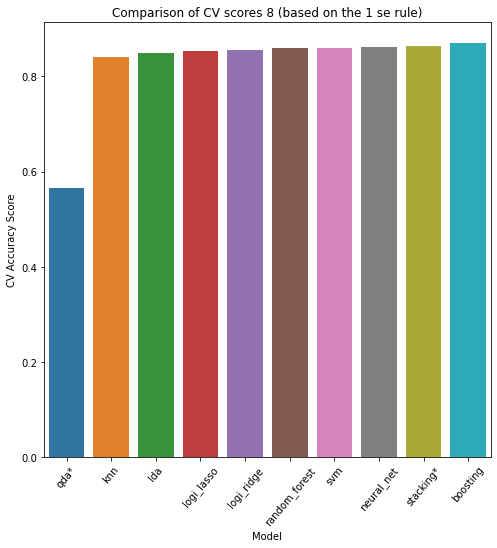

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

sns.barplot(data = df_accuracy_scores_melt.sort_values(by='value', ascending=True),  
            x = 'variable', 
            y = 'value');

plt.xticks(rotation = 50);
plt.title('Comparison of CV scores 8 (based on the 1 se rule)');
plt.xlabel('Model');
plt.ylabel('CV Accuracy Score');

**Note**: We did not use the 1 standard error rule for the models marked with an asterisk.

We can see from the plot above that the best models are Boosting, Stacking and Neural Net. They have a respective accuracy score of 0.869485, 0.863809 and 0.861574. Because the scores are quite close to each other, we think that it is important to also consider the performance on Kaggle to make the final decision.

## 4. Best model diagnostics and final kaggle prediction:


In order to find out which final model to go with, we can compare both the CV score and the Kaggle accuracy (based on the test set from the public leaderboard). Let's plot the information.

In [9]:
# Kaggle prediction scores for Boosting, Stacking and Neural Net

kaggle_scores = {'source': ['kaggle', 'cv'],
'boosting': [0.85219, 0.869485],
'neural_net': [0.85989, 0.861574],
'stacking': [0.85934, 0.863809]}

df_kaggle_scores = pd.DataFrame(data = kaggle_scores)
df_kaggle_scores_melt = df_kaggle_scores.melt(id_vars = "source")
df_kaggle_scores_melt

,source,variable,value
0,kaggle,boosting,0.852190
1,cv,boosting,0.869485
2,kaggle,neural_net,0.859890
3,cv,neural_net,0.861574
4,kaggle,stacking,0.859340
5,cv,stacking,0.863809


In [10]:
# Kaggle prediction scores for Boosting, Stacking and Neural Net

diff_kaggle_scores = {'boosting': [(0.85219-0.869485)*100],
'neural_net': [(0.85989-0.861574)*100],
'stacking': [(0.85934-0.863809)*100]}

df_diff_kaggle_scores = pd.DataFrame(data = diff_kaggle_scores)
df_diff_kaggle_scores_melt = df_diff_kaggle_scores.melt()
df_diff_kaggle_scores_melt

,variable,value
0,boosting,-1.7295
1,neural_net,-0.1684
2,stacking,-0.4469


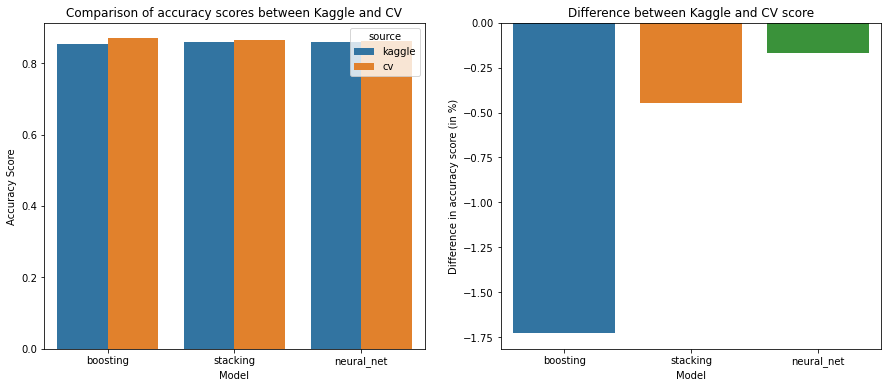

In [11]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,2)
sns.barplot(data = df_diff_kaggle_scores_melt.sort_values(by='value', ascending=True),  
            x = 'variable', 
            y = 'value');

plt.title('Difference between Kaggle and CV score');
plt.xlabel('Model');
plt.ylabel('Difference in accuracy score (in %)');


plt.subplot(1,2,1)
sns.barplot(data = df_kaggle_scores_melt.sort_values(by='value', ascending=True), 
            hue = 'source',
            x = 'variable', 
            y = 'value');

plt.title('Comparison of accuracy scores between Kaggle and CV');
plt.xlabel('Model');
plt.ylabel('Accuracy Score');


From the plot above, we can clearly see that Boosting was the one that performed the best on CV, but is also the one that performs the worst on the Kaggle predictions among the 3 models. When we look at the plot on the right hand side, we can see that the difference between the CV and Kaggle scores is huge compared to the other models (-1.7%).

Also, we submitted many different Boosting models that had a good CV score, but they all performed worse on the Kaggle public learderboard (by -1% or even less). For this reason, we think that the Boosting models that we tried were not as optimal as we thought. In particular, we think that we overfit the training data because Boosting is known to be sensitive on the tuning parameters. All these reasons lead us to think that this model is not the best one to submit to the Kaggle final prediction.

Regarding the Stacking model, we have less differences between the CV and the Kaggle score. It probably indicates a more robust model to new data. However, we only tried one stacking model for which no hyper-parameter has been tuned, and the Kaggle score was lower than for the Neural Net. Therefore, we did not consider stacking as the most appropriate model for the Kaggle final prediction.

Now, we are left with Neural Net and we think that this model is the most appropriate. Indeed, its CV score was one of the highest, and the Kaggle score is one of the highest too. Most importantly, the difference between the Kaggle score and the CV score is the lowest. 
Also, the fact that the model only contains two hidden layers (with respectively 9 and 6 neurons) reinforces the argument that the model is quite robust given its relatively 'low' complexity. 

**Therefore, Neural Net with (9, 6) neurons, `alpha = 0.15`, `max_iter = 500`, `solver = 'adam'`, `activation = 'relu'`, `learning_rate = 'adaptive'` is our preferred model and was used for Kaggle's Final Prediction Score.**

Please find below the model's code and diagnostics (where applicable). These codes can also be retrieved in Notebook #8.1:

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="constant", fill_value="Missing")),
           
           ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", MLPClassifier(random_state=1))]
)


# score = cross_val_score(clf, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -1, verbose=2).mean()
# print(score)

In [24]:
list_combinations_layers_2_bis = [(9,6), (4,7), (8,7), (8,5), (5,4), (9,2), (7,4), (5,9), (9,5), (8,2), (6,4), (8,9), (4,4), (7,5)]
list_combinations_layers_2_bis

[(9, 6),
 (4, 7),
 (8, 7),
 (8, 5),
 (5, 4),
 (9, 2),
 (7, 4),
 (5, 9),
 (9, 5),
 (8, 2),
 (6, 4),
 (8, 9),
 (4, 4),
 (7, 5)]

In [26]:
hyper_param_2_bis = {
    "classifier__hidden_layer_sizes": list_combinations_layers_2_bis, 
              "classifier__activation": ['relu'],
              "classifier__solver": ['adam', 'sgd'],
              "classifier__alpha": [0.05, 0.07, 0.1, 0.15],
              "classifier__learning_rate": ['adaptive'],
              "classifier__max_iter": [500],
}

hyper_param_2_bis

{'classifier__hidden_layer_sizes': [(9, 6),
  (4, 7),
  (8, 7),
  (8, 5),
  (5, 4),
  (9, 2),
  (7, 4),
  (5, 9),
  (9, 5),
  (8, 2),
  (6, 4),
  (8, 9),
  (4, 4),
  (7, 5)],
 'classifier__activation': ['relu'],
 'classifier__solver': ['adam', 'sgd'],
 'classifier__alpha': [0.05, 0.07, 0.1, 0.15],
 'classifier__learning_rate': ['adaptive'],
 'classifier__max_iter': [500]}

In [27]:
nn_grid_search_2_bis_cv = GridSearchCV(estimator = clf, param_grid=hyper_param_2_bis, scoring="accuracy",
                           cv = KFold(n_splits=5, shuffle=True, random_state=1), n_jobs=-1, verbose=1)

In [28]:
nn_grid_search_2_bis_cv.fit(X, y)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


/Users/mathisdasilva/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mathisdasilva/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['occ_code_level2',
                                                                          'age',
                                                                          'stock_dividends',
                                                                          'wage_per_hour',
                 

In [29]:
cv_res_2_bis = pd.DataFrame(nn_grid_search_2_bis_cv.cv_results_)
pd.set_option("display.max_rows", None)
cv_res_2_bis.sort_values(by="mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__activation,param_classifier__alpha,param_classifier__hidden_layer_sizes,param_classifier__learning_rate,param_classifier__max_iter,param_classifier__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
75,224.856828,225.522667,0.089827,0.012715,relu,0.1,"(8, 2)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.864494,0.864585,0.862558,0.859354,0.861185,0.862435,0.001997,1
7,47.492137,12.329858,0.094663,0.024609,relu,0.05,"(8, 5)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.861930,0.863578,0.861551,0.862009,0.861917,0.862197,0.000708,2
35,50.073894,9.590231,0.099777,0.025680,relu,0.07,"(8, 5)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.862571,0.863761,0.861460,0.861368,0.861643,0.862160,0.000908,3
47,54.275853,11.846122,0.090215,0.004770,relu,0.07,"(8, 2)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.863029,0.863578,0.862192,0.859628,0.862009,0.862087,0.001354,4
67,60.405132,7.048112,0.093019,0.009774,relu,0.1,"(9, 2)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.865043,0.862846,0.860727,0.861460,0.859811,0.861977,0.001826,5
91,46.225005,3.096729,0.097496,0.009778,relu,0.15,"(8, 5)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.862571,0.863670,0.860819,0.861276,0.861368,0.861941,0.001041,6
11,63.302059,12.555503,0.089240,0.008060,relu,0.05,"(9, 2)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.864311,0.863487,0.861734,0.862009,0.858163,0.861941,0.002113,7
63,44.770199,3.964934,0.084478,0.003932,relu,0.1,"(8, 5)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.862479,0.863120,0.861185,0.861093,0.861368,0.861849,0.000807,8
19,55.580473,14.025441,0.083100,0.005622,relu,0.05,"(8, 2)",adaptive,500,sgd,"{'classifier__activation': 'relu', 'classifier...",0.862479,0.863578,0.862284,0.859995,0.860727,0.861813,0.001286,9
88,16.065945,2.744203,0.091825,0.011072,relu,0.15,"(8, 7)",adaptive,500,adam,"{'classifier__activation': 'relu', 'classifier...",0.863761,0.859733,0.861643,0.861460,0.862375,0.861794,0.001311,10


In [30]:
mean_scores = nn_grid_search_2_bis_cv.cv_results_["mean_test_score"]
best_index = np.argmax(mean_scores)
se_scores = nn_grid_search_2_bis_cv.cv_results_["std_test_score"] / np.sqrt(5)

one_stand_error_data_frame = cv_res_2_bis[cv_res_2_bis["mean_test_score"] >= (mean_scores[best_index] - se_scores[best_index])]
one_stand_error_data_frame[one_stand_error_data_frame["mean_test_score"] == one_stand_error_data_frame["mean_test_score"].min()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__activation,param_classifier__alpha,param_classifier__hidden_layer_sizes,param_classifier__learning_rate,param_classifier__max_iter,param_classifier__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
84,26.651254,5.68713,0.107958,0.024475,relu,0.15,"(9, 6)",adaptive,500,adam,"{'classifier__activation': 'relu', 'classifier...",0.867973,0.862388,0.857888,0.860727,0.858896,0.861574,0.003552,16


## 5. Conclusion:

This Kaggle competition has been a great learning opportunity that allows us to apply what we learn in class and pushes us to deepen our knowledge of machine learning through self-learning.

Given the time limit of the competition, competing priorities from other courses this semester as well as the limited computational power, we acknowledge that there are a lot of room for improvement regarding our approachs and model performance. Possible future improvements include:

 - A more thorough and more well-thought-out approach to feature engineering, such as different transformation techniques on numerical variables, experimentation with combining different features as well as dimension reduction methods such as PCA for our data set. Furthermore, we tried predicting using processed dataset where we have regrouped some categories together in order to reduce the dimensionality. Unfortunately, we compared this model to the one without any type of feature engineering using a logistic regression and it wasn’t performing as well. This is indicating that maybe the feature engineering part could have been improved.
 
 - We could also look at other imputation methods like missForest (used to impute missing values particularly in the case of mixed-type data) and iterative imputation (modeling a column with the missing values (target variable) as a function of other features (predictor variables)). Indeed, since the imputation methods were done through a pipeline for an accurate GridSearch, it required a lot of computational power. Therefore, we have considered simple ones such as the mean, median, most frequent and constant imputation. As an idea for improvement, we could have a more rigorous approach to evaluate the performance of the feature engineered data in order to identify the version that would enhance the most of our predictive power.
 

 - Furthermore, as mentioned at the end of the feature engineering section, there is a consideration/trade-off between **training time**, **prediction time** and **accuracy**: Per our research, knowing which metrics we are optimizing for is important in pick the right model. For example, self-driving cars would need very speedy prediction times fraud detection system would need quick training time to update the latest scam patterns in their data, whereas applications in medical diagnosis would prioritize accuracy over training time.  For our case, the lack of in-depth and full-fledged knowledge of feature engineering coupled with the priority for accuracy for the Kaggle competition prompted us to use the original data set with some feature engineering (imputation) on the missing values and scaling, mentioned in the previous point, as laid out in the pipelines.
 
 
 - Finally, as acknowledged in the model comparison section, due to lack of computational power to fit different variations/tuned versions of more complexed models, we stopped short of exploring each model after some point. Thus a potential point for improvement in the future, when we have better knowledge of feature engineering as well as better computational power, would be to further fine-tune relevant models (such as GridSearch in Stacking) to see if better results could be obtained. 
